In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import time
import matplotlib.patches as patches
import glob

import matplotlib.colors as mcolors

from netCDF4 import Dataset
from scipy import stats

from wrf import getvar

from matplotlib.animation import FuncAnimation


## estimate of pressure levels from the hybrid coordinate:
## lev0=975, 5=925, 8=850, 12=700, 17=500,  19=400, 21=300, 24=200, 29=100

### First, load the lats, lons, and levs used for plotting later.

In [6]:
### Plot the height vs. time sections of potential temperature
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
file = path+'Amazon_dveg9_201409_ILgrassland/wrfout_d01_2014-09-01_00:00:00'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds1:
    lats=ds1['XLAT'][0,:,0]
    lons=ds1['XLONG'][0,0,:]
    lu1=ds1['LU_INDEX'][0,:,:]
    pb = ds1['PB'][0,:,:,:]

## Check whether LUindex is changed correctly

[Text(1, 5.0, 'forests'),
 Text(1, 9.0, 'savannas'),
 Text(1, 10.0, 'grassland'),
 Text(1, 12.0, 'cropland'),
 Text(1, 17.0, 'water')]

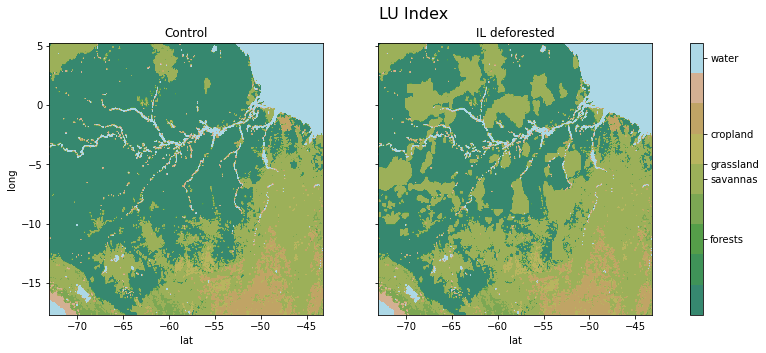

In [7]:
file0 = path+'Amazon_dveg9_201409/ATMS3D_d01_2014-12-30_00:00:00'
with xarray.open_dataset(file0,decode_times=False,
                         mask_and_scale='True') as ds0:
    lu0=ds0['LU_INDEX'][0,:,:]

file1 = path+'Amazon_dveg9_201409_ILgrassland/ATMS3D_d01_2014-12-30_00:00:00'
with xarray.open_dataset(file1,decode_times=False,
                         mask_and_scale='True') as ds1:
    lu1=ds1['LU_INDEX'][0,:,:]

### generate a new cmap
cmap = plt.get_cmap('gist_earth')
colors = cmap(np.linspace(0.3, 0.89, 100))
new_cmap = mcolors.LinearSegmentedColormap.from_list('test',colors)
new_cmap.set_over('lightblue')
############

fig,axes = plt.subplots(1,2,figsize=(13.5,5),sharex=True,sharey=True)
axes = axes.ravel()  
im=axes[0].contourf(lons,lats,lu0,cmap=new_cmap,vmax=16)  # ctrl luindex
axes[1].contourf(lons,lats,lu1,cmap=new_cmap,vmax=16)     # ILdeforeste luindex
axes[0].set_title('Control')
axes[1].set_title('IL deforested')
axes[0].set_xlabel('lat')
axes[1].set_xlabel('lat')
axes[0].set_ylabel('long')
plt.suptitle('LU Index',fontsize=16)
cbar = fig.colorbar(im,ax=axes, ticks = [5,9,10,12,17])
cbar.ax.set_yticklabels(['forests', 'savannas','grassland','cropland','water'])  # vertically oriented colorbar

# Soil moisture

In [8]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Amazon_dveg9_201409/Land.201409_201412.ctrl.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
    
with xarray.open_dataset(path+'Amazon_dveg9_201409_ILgrassland/Land.201409_201412.ILgrassland.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
dif_lu = lu1 - lu0
smois0 = ds0['SMOIS'].where(dif_lu>0,np.nan)
smois0_areaave = smois0.mean(('south_north','west_east'))
smois1 = ds1['SMOIS'].where(dif_lu>0,np.nan)
smois1_areaave = smois1.mean(('south_north','west_east'))

#smois1_areaave.to_dataset().to_netcdf(path+'SMOIS.201409_201412.ILave.ILgrassland.nc')
#smois0_areaave.to_dataset().to_netcdf(path+'SMOIS.201409_201412.ILave.ctrl.nc')

ok
ok


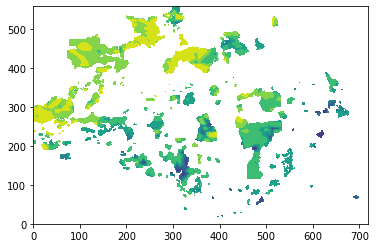

In [13]:
plt.contourf(smois1[0,0,:,:])

Text(0, 0.5, 'Soil Moisture [m3/m3]')

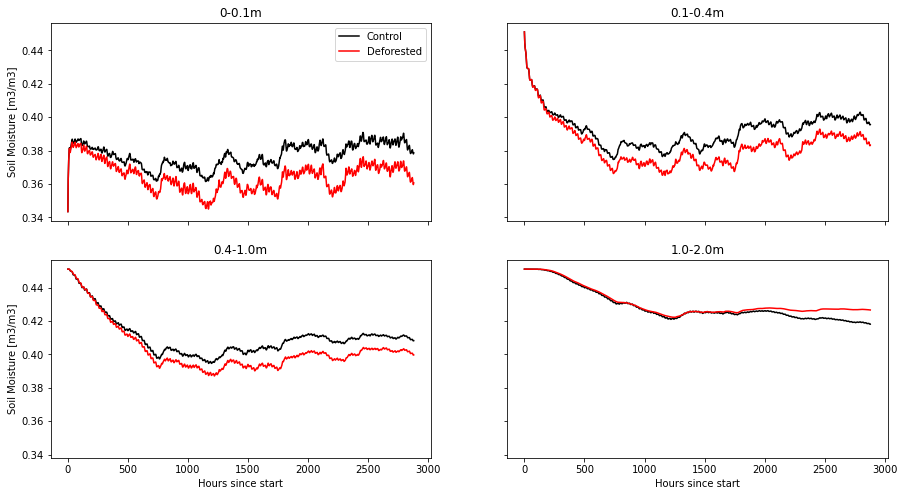

In [9]:
fig,axes = plt.subplots(2,2,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
titles=['0-0.1m','0.1-0.4m','0.4-1.0m','1.0-2.0m']
for ii in range(4):
    axes[ii].plot(smois0_areaave[:,ii],'k',label='Control')
    axes[ii].plot(smois1_areaave[:,ii],'r',label='Deforested')
    axes[ii].set_title(titles[ii])
axes[0].legend()
axes[2].set_xlabel('Hours since start')
axes[3].set_xlabel('Hours since start')
axes[0].set_ylabel('Soil Moisture [m3/m3]')
axes[2].set_ylabel('Soil Moisture [m3/m3]')